<a href="https://colab.research.google.com/github/QuinnKun/-Titanic/blob/master/My_review_of_Valuation_Accuracy_TPS_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

At Opendoor, we care a lot about ensuring high valuation accuracy. We have a combination of human and algorithmic valuators who -- in both training scenarios and in production -- produce numerous valuations for different homes.

Given a **manually-entered** dataset of multiple valuators’ *valuations* (keyed by *valuator_id*) of different homes (keyed by *home_id*), evaluated against their ultimate *close_prices*.

1.   We wish to understand the performance of our valuators. Define and calculate some metrics that will help us understand valuator performance. [max 10m] 
2.   How similar are our valuators’ estimates to one another? What implications does this have for reducing error via combining estimates? [max 15m]
3.   Create and evaluate a rule that will combine valuations to achieve higher accuracy than any individual valuator. [max 15m]
4.   Considering operational and cost constraints, design a system that will help us trade off among our key business objectives. [remaining time]

Sample data
```
  home_id close_price valuator_id valuation
    <int>       <dbl> <chr>           <dbl>
         1     220674. V1            222988.
         1     220674. V2            226617.
         1     220674. V3            229378.
         1     220674. V4            214982.
         1     220674. V5            224865.
         2     251957. V1            248071.
         ...
```

To begin, click "Runtime" in the menu bar at the top and hit "Run all".

In [102]:
import pandas as pd

In [103]:
val_df = pd.read_json("{\"home_id\":[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,10,10,10,10,10,11,11,11,11,11,12,12,12,12,12,13,13,13,13,13,14,14,14,14,14,15,15,15,15,15,16,16,16,16,16,17,17,17,17,17,18,18,18,18,18,19,19,19,19,19,20,20,20,20,20,21,21,21,21,21,22,22,22,22,22,23,23,23,23,23,24,24,24,24,24,25,25,25,25,25,26,26,26,26,26,27,27,27,27,27,28,28,28,28,28,29,29,29,29,29,30,30,30,30,30,31,31,31,31,31,32,32,32,32,32,33,33,33,33,33,34,34,34,34,34,35,35,35,35,35,36,36,36,36,36,37,37,37,37,37,38,38,38,38,38,39,39,39,39,39,40,40,40,40,40,41,41,41,41,41,42,42,42,42,42,43,43,43,43,43,44,44,44,44,44,45,45,45,45,45,46,46,46,46,46,47,47,47,47,47,48,48,48,48,48,49,49,49,49,49,50,50,50,50,50],\"close_price\":[254086.656793083,254086.656793083,254086.656793083,254086.656793083,254086.656793083,262215.028102715,262215.028102715,262215.028102715,262215.028102715,262215.028102715,247910.355609613,247910.355609613,247910.355609613,247910.355609613,247910.355609613,242570.06975142,242570.06975142,242570.06975142,242570.06975142,242570.06975142,270866.524198589,270866.524198589,270866.524198589,270866.524198589,270866.524198589,284386.850716474,284386.850716474,284386.850716474,284386.850716474,284386.850716474,177907.113553244,177907.113553244,177907.113553244,177907.113553244,177907.113553244,267182.186657375,267182.186657375,267182.186657375,267182.186657375,267182.186657375,261241.73220336,261241.73220336,261241.73220336,261241.73220336,261241.73220336,237241.968353318,237241.968353318,237241.968353318,237241.968353318,237241.968353318,278530.384227304,278530.384227304,278530.384227304,278530.384227304,278530.384227304,238322.884548449,238322.884548449,238322.884548449,238322.884548449,238322.884548449,241470.080146013,241470.080146013,241470.080146013,241470.080146013,241470.080146013,275722.293342394,275722.293342394,275722.293342394,275722.293342394,275722.293342394,301588.818973618,301588.818973618,301588.818973618,301588.818973618,301588.818973618,258101.647028117,258101.647028117,258101.647028117,258101.647028117,258101.647028117,237334.479706371,237334.479706371,237334.479706371,237334.479706371,237334.479706371,214326.601154212,214326.601154212,214326.601154212,214326.601154212,214326.601154212,240069.01063363,240069.01063363,240069.01063363,240069.01063363,240069.01063363,221805.120204699,221805.120204699,221805.120204699,221805.120204699,221805.120204699,242232.022506436,242232.022506436,242232.022506436,242232.022506436,242232.022506436,261831.375046647,261831.375046647,261831.375046647,261831.375046647,261831.375046647,224444.287239284,224444.287239284,224444.287239284,224444.287239284,224444.287239284,329475.006432846,329475.006432846,329475.006432846,329475.006432846,329475.006432846,254680.350269952,254680.350269952,254680.350269952,254680.350269952,254680.350269952,283906.218023648,283906.218023648,283906.218023648,283906.218023648,283906.218023648,181326.280604797,181326.280604797,181326.280604797,181326.280604797,181326.280604797,272230.034715863,272230.034715863,272230.034715863,272230.034715863,272230.034715863,210512.645186453,210512.645186453,210512.645186453,210512.645186453,210512.645186453,277594.110328274,277594.110328274,277594.110328274,277594.110328274,277594.110328274,261943.904663559,261943.904663559,261943.904663559,261943.904663559,261943.904663559,237774.142621907,237774.142621907,237774.142621907,237774.142621907,237774.142621907,289727.758905318,289727.758905318,289727.758905318,289727.758905318,289727.758905318,228963.049922592,228963.049922592,228963.049922592,228963.049922592,228963.049922592,232581.570872784,232581.570872784,232581.570872784,232581.570872784,232581.570872784,219967.834569237,219967.834569237,219967.834569237,219967.834569237,219967.834569237,229954.641797398,229954.641797398,229954.641797398,229954.641797398,229954.641797398,278355.548601192,278355.548601192,278355.548601192,278355.548601192,278355.548601192,263011.064486355,263011.064486355,263011.064486355,263011.064486355,263011.064486355,280154.776530311,280154.776530311,280154.776530311,280154.776530311,280154.776530311,238296.44007839,238296.44007839,238296.44007839,238296.44007839,238296.44007839,261291.108753239,261291.108753239,261291.108753239,261291.108753239,261291.108753239,257324.947734595,257324.947734595,257324.947734595,257324.947734595,257324.947734595,207212.279728524,207212.279728524,207212.279728524,207212.279728524,207212.279728524,303352.878624264,303352.878624264,303352.878624264,303352.878624264,303352.878624264,254033.42982801,254033.42982801,254033.42982801,254033.42982801,254033.42982801,272967.969974736,272967.969974736,272967.969974736,272967.969974736,272967.969974736,278654.100307269,278654.100307269,278654.100307269,278654.100307269,278654.100307269,248483.028956732,248483.028956732,248483.028956732,248483.028956732,248483.028956732,240825.537406991,240825.537406991,240825.537406991,240825.537406991,240825.537406991],\"valuator_id\":[\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\"],\"valuation\":[255134.834485405,260066.519532166,268071.787817652,254289.709353301,261199.691465977,259527.443153745,265106.213136897,275566.901656964,257593.088368332,262514.345666911,248395.870950347,253199.079454137,265863.678571392,249839.887932312,253490.438105186,239345.447178402,240972.172431815,244458.822339622,235442.204146198,236499.254486342,278207.994702035,275002.949779888,274207.616293474,274097.108471602,272786.348839321,292770.995458653,296301.563815943,304830.66051826,284513.633304532,28495197.8720433,176815.400070185,182010.402376131,187300.388486845,170103.864515264,179346.627406192,263183.925715637,270526.758801197,274885.916596351,261379.766894796,263743.955537899,264774.556389416,264984.34344278,268915.632984732,259515.634930838,258642.009259784,236171.298337479,247333.221151283,249530.690186613,230079.644255669,243010.372706414,292158.89496363,276562.33753911,282715.222178206,271030.340880117,277833.889037267,238672.575278634,240197.536826469,247816.810937683,235297.322442872,239284.828542675,243926.924786017,253245.608763205,253105.442588627,238842.864659618,248333.627908697,272798.993958682,289497.064267795,291710.799227994,283325.525587196,292086.298393903,299570.165040666,300296.395906178,309109.11119807,295137.569129328,297510.343377687,258946.863694545,261309.774185602,272372.164725738,250712.012551147,265071.712627161,228638.24667684,241117.897830194,245952.420245732,235904.96989211,239822.981837718,222672.61443829,216071.236110747,217679.893055436,213411.86426411,212368.245302534,241939.353516564,242416.490112141,248217.942746641,233759.406316586,238146.770690131,233065.793995612,224713.994357388,230039.343018673,217934.488869254,223814.999471418,245785.967609541,243468.623714634,244098.514666137,233836.363041546,248628.286102388,259499.574554309,266583.301940199,268008.899851115,254433.883048352,259882.764479172,227482.136441562,229274.450292728,232766.777060764,222240.363807908,229179.245533762,322239.397728181,342366.033928037,346719.712431529,33626844.1027864,340941.10884519,24951171.2420993,257122.033456689,258572.714684013,251470.529009668,255053.483446312,285229.289455109,289765.291665277,298814.912908947,279800.842279552,284653.512218937,178980.895650474,186866.44778061,190969.939552412,178543.396579724,186885.068417357,270204.65886658,284528.480456905,284330.914282396,27364263.6104589,287447.155014039,210209.710358823,215732.175942865,223200.642368992,209005.690277888,218364.547240226,275338.175921573,279589.481238899,286322.637291232,271154.080483742,281278.801801051,261087.066971912,261789.60167484,263376.111690656,257413.406398545,257189.343551239,236982.610130921,243729.249510607,240766.682953444,237482.296737285,246656.612114669,295924.417454599,295319.526356787,296788.721385922,28605513.9008779,291988.200928896,221567.133512405,229398.482438328,240330.112474124,230943.964801322,229718.950129719,233534.503955404,244480.032931184,248465.468546151,-235264.808209346,242475.32049622,220994.866682512,223091.414119719,231864.640322765,222084.973797192,-226411.435051957,234519.055073235,235897.541106059,243550.758098731,226762.07466458,237975.792384182,276811.872630478,283007.523851897,285501.156502045,279849.306481771,281599.095820578,266308.040582414,261069.871564181,271427.970578126,257114.989877174,260289.755985879,282492.06907741,281873.780968694,287007.871315994,277048.237004163,278119.087169862,235462.154962036,238498.769615953,250937.734207939,238727.067023325,242975.678550685,266745.798124844,270050.157205802,275324.983135067,257639.481098322,264345.072630672,263863.665841277,255491.954898645,265669.329140506,256096.451278474,257991.906706471,211345.807106016,209579.680812597,212916.17469508,202724.918161256,211247.893149227,310027.564556124,308289.559239202,320102.933430402,307669.883507716,307544.422325133,255740.434695621,261798.281924624,262200.258346709,260245.838982272,260799.617673027,267336.583114866,281522.349830072,279158.854651009,263940.657076489,275054.971400102,276960.349450775,280385.378787663,284495.320171568,275536.794906958,276226.919118749,242442.933179126,250385.182616562,258267.14591028,247266.842660414,254014.703336957,239767.128603376,237069.476422985,249811.783614102,236652.888778894,240036.120019573]}")

In [104]:
val_df.head()

,home_id,close_price,valuator_id,valuation
0,1,254086.656793,V1,255134.834485
1,1,254086.656793,V2,260066.519532
2,1,254086.656793,V3,268071.787818
3,1,254086.656793,V4,254289.709353
4,1,254086.656793,V5,261199.691466


In [105]:
val_df.describe()

,home_id,close_price,valuation
count,250.000000,250.000000,2.500000e+02
mean,25.500000,252719.763012,8.185118e+05
std,14.459818,29080.727965,3.998521e+06
min,1.000000,177907.113553,-2.352648e+05
25%,13.000000,237334.479706,2.376057e+05
50%,25.500000,254383.503532,2.573014e+05
75%,38.000000,272967.969975,2.760619e+05
max,50.000000,329475.006433,3.362684e+07


In [106]:
val_df.valuator_id.value_counts()

V4    50
V3    50
V2    50
V5    50
V1    50
Name: valuator_id, dtype: int64

In [107]:
import numpy as np
val_df["val_off"] = np.abs(val_df["valuation"]-val_df["close_price"])

In [108]:
val_df.groupby("valuator_id")["val_off"].agg(["var","mean"])

,var,mean
valuator_id,,
V1,1.219471e+13,4.975379e+05
V2,1.299189e+07,4.761068e+03
V3,2.056640e+07,9.562655e+03
V4,5.071440e+13,1.787128e+06
V5,1.590573e+13,5.774102e+05


In [109]:
val_df.groupby("valuator_id").agg("mean")

,home_id,close_price,valuation,val_off
valuator_id,,,,
V1,25.5,252719.763012,7.474555e+05,4.975379e+05
V2,25.5,252719.763012,2.569791e+05,4.761068e+03
V3,25.5,252719.763012,2.622824e+05,9.562655e+03
V4,25.5,252719.763012,2.014985e+06,1.787128e+06
V5,25.5,252719.763012,8.108571e+05,5.774102e+05


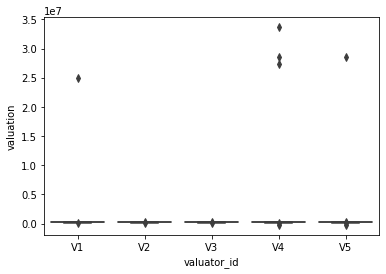

In [110]:
import seaborn as sns
sns.boxplot(x = 'valuator_id', y = 'valuation', data = val_df) 

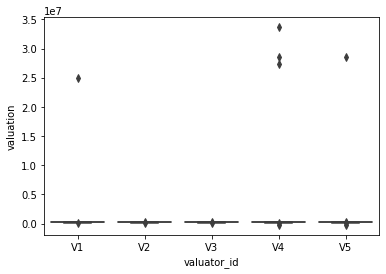

In [111]:
sns.boxplot(x = 'valuator_id', y = 'valuation', data = val_df) 

In [112]:
val_df[val_df["valuation"]>24000000]

,home_id,close_price,valuator_id,valuation,val_off
29,6,284386.850716,V5,2.849520e+07,2.821081e+07
118,24,329475.006433,V4,3.362684e+07,3.329737e+07
120,25,254680.350270,V1,2.495117e+07,2.469649e+07
138,28,272230.034716,V4,2.736426e+07,2.709203e+07
163,33,289727.758905,V4,2.860551e+07,2.831579e+07


In [113]:
df = val_df
df.loc[val_df["valuation"]>24000000,"valuation"] = df.loc[val_df["valuation"]>24000000,"valuation"]/100
df.loc[val_df["valuation"]<0,"valuation"] = df.loc[val_df["valuation"]<0,"valuation"]*(-1)

In [114]:
df[val_df["valuation"]>24000000]

,home_id,close_price,valuator_id,valuation,val_off


In [115]:
val_df[val_df["valuation"]<0]

,home_id,close_price,valuator_id,valuation,val_off


In [116]:
df["val_off"] = np.abs(df["valuation"]-df["close_price"])

In [117]:
df.groupby("valuator_id")["val_off"].agg(["var","mean"])

,var,mean
valuator_id,,
V1,9.024098e+06,3711.416552
V2,1.299189e+07,4761.067582
V3,2.056640e+07,9562.655420
V4,6.155380e+06,3958.592366
V5,1.281148e+07,4406.552969


In [118]:
# simple
total_variance = df.val_off.var()

In [119]:
in_group_variance= np.sum(df.groupby("valuator_id")["val_off"].agg("var"))

In [120]:
df["val_diff"] = df["valuation"]-df["close_price"]
df.val_diff.describe()

count      250.000000
mean      3035.241504
std       5965.592876
min      -9027.312898
25%      -1584.341982
50%       2449.263913
75%       6860.934518
max      20443.809802
Name: val_diff, dtype: float64

In [121]:
df[df["val_diff"]==df["val_diff"].max()]

,home_id,close_price,valuator_id,valuation,val_off,val_diff
27,6,284386.850716,V3,304830.660518,20443.809802,20443.809802


In [122]:
pivot = df.pivot_table('val_diff', index='home_id', columns='valuator_id' )
pivot


valuator_id,V1,V2,V3,V4,V5
home_id,,,,,
1,1048.177692,5979.862739,13985.131025,203.052560,7113.034673
2,-2687.584949,2891.185034,13351.873554,-4621.939734,299.317564
3,485.515341,5288.723845,17953.322962,1929.532323,5580.082496
4,-3224.622573,-1597.897320,1888.752588,-7127.865605,-6070.815265
5,7341.470503,4136.425581,3341.092095,3230.584273,1919.824641
6,8384.144742,11914.713099,20443.809802,126.782588,565.128004
7,-1091.713483,4103.288823,9393.274934,-7803.249038,1439.513853
8,-3998.260942,3344.572144,7703.729939,-5802.419763,-3438.231119
9,3532.824186,3742.611239,7673.900781,-1726.097273,-2599.722944


In [123]:
# F score = Between group variance / df / withinin group vairance / df
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(pivot['V1'], pivot['V2'], pivot['V3'], pivot['V4'], pivot['V5'])
print(fvalue, pvalue)
# 48.60272598736838 4.603568488007733e-30

48.60272598736838 4.603568488007733e-30


In [124]:
pivot.shape

(50, 5)

In [125]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('val_diff ~ C(valuator_id)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)

,sum_sq,df,F,PR(>F)
C(valuator_id),3.920635e+09,4.0,48.602726,4.603568e-30
Residual,4.940852e+09,245.0,NaN,NaN


In [126]:
pip install bioinfokit

In [127]:
import bioinfokit
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='val_diff', anova_model='val_diff ~ C(valuator_id)')
res.anova_summary
# output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
C(valuator_id),4.0,3.920635e+09,9.801586e+08,48.602726,4.603568e-30
Residual,245.0,4.940852e+09,2.016674e+07,NaN,NaN


In [128]:
SSE =  (pivot["V1"].var()+ pivot["V2"].var()+pivot["V3"].var()+pivot["V4"].var()+pivot["V5"].var())
SSE
# above is wrong , because variance is avarage of SSE

100833709.54224022

In [129]:
MSV_E= SSE/(5*49)
MSV_B =  np.array([pivot["V1"].mean(),  pivot["V2"].mean(), pivot["V3"].mean(), pivot["V4"].mean(), pivot["V5"].mean()]).var()/4
# ABOVE IS WRONG,  population mean  is not np.array(mean), but variance is not SSE


In [130]:
np.array([(pivot["V1"].mean() - pivot.mean())**2,  (pivot["V2"].mean()- pivot.mean())**2,\
( pivot["V3"].mean()- pivot.mean())**2, (pivot["V4"].mean()- pivot.mean())**2, (pivot["V5"].mean()- pivot.mean())**2])

array([[0.00000000e+00, 1.26511006e+07, 7.85021354e+07, 9.23997241e+06,
        5.22760882e+06],
       [1.26511006e+07, 0.00000000e+00, 2.81250387e+07, 4.35147472e+07,
        1.61402313e+06],
       [7.85021354e+07, 2.81250387e+07, 0.00000000e+00, 1.41607034e+08,
        4.32141445e+07],
       [9.23997241e+06, 4.35147472e+07, 1.41607034e+08, 0.00000000e+00,
        2.83676476e+07],
       [5.22760882e+06, 1.61402313e+06, 4.32141445e+07, 2.83676476e+07,
        0.00000000e+00]])

In [131]:
pivot.mean().mean()

3035.2415042344787

In [132]:
# https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistesting-anova/bs704_hypothesistesting-anova_print.html
# https://docs.google.com/spreadsheets/d/1l02RZ-4oHOaxQWB-JfJwI45cMlSXodI-E_fViczXT9U/edit#gid=0
SSE =  (pivot["V1"].var()+ pivot["V2"].var()+pivot["V3"].var()+pivot["V4"].var()+pivot["V5"].var())*49
print(SSE)
SSB= np.array([(pivot["V1"].mean() - pivot.mean().mean())**2,  (pivot["V2"].mean()- pivot.mean().mean())**2,\
( pivot["V3"].mean()- pivot.mean().mean())**2, (pivot["V4"].mean()- pivot.mean().mean())**2, (pivot["V5"].mean()- pivot.mean().mean())**2]).sum()*50
print(SSB)
(SSB/4) /(SSE/(49*5))

4940851767.569771
3920634524.1371145


48.60272598736837

In [133]:
np.array([.6,3.0,3.4,1.2]).var()*5


6.9375

In [134]:
# similarity of paris
# consine similairty/ geometric

np.sum((df.loc[df.valuator_id=="V1",["valuation"]].values -df.loc[df.valuator_id=="V2",["valuation"]].values )**2)

2770749054.0070214

In [135]:
score=df[["valuator_id","valuation"]].values.T

In [136]:
score.shape

(2, 250)

In [137]:
# df.loc[df.val_diff<=-467846]

In [138]:
val_df.iloc[173]

home_id             35
close_price     232582
valuator_id         V4
valuation       235265
val_off        2683.24
val_diff       2683.24
Name: 173, dtype: object

In [139]:
pivot_ds = df.pivot_table("val_diff",index="valuator_id",columns="home_id")
dist_sq = np.sum((pivot_ds.values[:,np.newaxis,:] - pivot_ds.values[np.newaxis,:,:])**2, axis=-1 )
dist_sq.shape

(5, 5)

In [140]:
pivot_ds

home_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
valuator_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
V1,1048.177692,-2687.584949,485.515341,-3224.622573,7341.470503,8384.144742,-1091.713483,-3998.260942,3532.824186,-1070.670016,13628.510736,349.690730,2456.844640,-2923.299384,-2018.653933,845.216666,-8696.233030,8346.013284,1870.342883,11260.673791,3553.945103,-2331.800492,3037.849202,-7235.608705,-5168.637849,1323.071431,-2345.384954,-2025.375849,-302.934828,-2255.934407,-856.837692,-791.532491,6196.658549,-7395.916410,952.933083,1027.032113,4564.413276,-1543.675971,3296.976096,2337.292547,-2834.285116,5454.689372,6538.718107,4133.527377,6674.685932,1707.004868,-5631.386860,-1693.750856,-6040.095778,-1058.408804
V2,5979.862739,2891.185034,5288.723845,-1597.897320,4136.425581,11914.713099,4103.288823,3344.572144,3742.611239,10091.252798,-1968.046688,1874.652278,11775.528617,13774.770925,-1292.423067,3208.127157,3783.418124,1744.634957,2347.479479,2908.874153,1236.601208,4751.926894,4830.163053,12891.027495,2441.683187,5859.073642,5540.167176,12298.445741,5219.530756,1995.370911,-154.302989,5955.106889,5591.767451,435.432516,11898.462058,3123.579550,5942.899309,4651.975251,-1941.192922,1719.004438,202.329538,8759.048453,-1832.992836,2367.401084,4936.680615,7764.852097,8554.379855,1731.278480,1902.153660,-3756.060984
V3,13985.131025,13351.873554,17953.322962,1888.752588,3341.092095,20443.809802,9393.274934,7703.729939,7673.900781,12288.721833,4184.837951,9493.926389,11635.362443,15988.505886,7520.292224,14270.517698,8617.940539,3353.291901,8148.932113,8234.222814,1866.492160,6177.524804,8322.489821,17244.705999,3892.364414,14908.694885,9643.658948,12100.879567,12687.997183,8728.526963,1432.207027,2992.540332,7060.962481,11367.062552,15883.897673,11896.805754,13596.116301,7145.607901,8416.906092,6853.094786,12641.294130,14033.874382,8344.381406,5703.894967,16750.054806,8166.828519,6190.884676,5841.219864,9784.116954,8986.246207
V4,203.052560,-4621.939734,1929.532323,-7127.865605,3230.584273,126.782588,-7803.249038,-5802.419763,-1726.097273,-7162.324098,-7500.043347,-3025.562106,-2627.215486,7603.232245,-6451.249844,-7389.634477,-1429.509814,-914.736890,-6309.604317,-3870.631335,-8395.659465,-7397.491998,-2203.923431,6793.434595,-3209.821260,-4105.375744,-2782.884025,1412.601389,-1506.954909,-6440.029845,-4530.498265,-291.845885,-3672.619897,1980.914879,2683.237337,2117.139228,-3192.567133,1493.757881,-5896.074609,-3106.539526,430.626945,-3651.627655,-1228.496456,-4487.361567,4317.004883,6212.409154,-9027.312898,-3117.305400,-1216.186296,-4172.648628
V5,7113.034673,299.317564,5580.082496,-6070.815265,1919.824641,565.128004,1439.513853,-3438.231119,-2599.722944,5768.404353,-696.495190,961.943994,6863.547763,16364.005052,-4078.475596,6970.065599,2488.502131,-1958.355852,-1922.239943,2009.879267,6396.263596,-1948.610567,4734.958294,11466.102412,373.133176,747.294195,5558.787813,15217.120298,7851.902054,3684.691473,-4754.561112,8882.469493,2260.442024,755.900207,9893.749623,6443.600483,8021.150587,3243.547219,-2721.308500,-2035.689360,4679.238472,3053.963877,666.958972,4035.613421,4191.543701,6766.187845,2087.001425,-2427.181189,5531.674380,-789.417387


In [141]:
((pivot_ds.values[:,np.newaxis,:] - pivot_ds.values[np.newaxis,:,:])**2).shape

(5, 5, 50)

In [142]:
dist_sq

array([[0.00000000e+00, 2.77074905e+09, 6.14793286e+09, 2.48071840e+09,
        2.79762858e+09],
       [2.77074905e+09, 0.00000000e+00, 2.21932177e+09, 3.09259142e+09,
        7.06981025e+08],
       [6.14793286e+09, 2.21932177e+09, 0.00000000e+00, 8.09586032e+09,
        3.22880018e+09],
       [2.48071840e+09, 3.09259142e+09, 8.09586032e+09, 0.00000000e+00,
        2.31574696e+09],
       [2.79762858e+09, 7.06981025e+08, 3.22880018e+09, 2.31574696e+09,
        0.00000000e+00]])

In [143]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 1, 4, 2],
       [1, 4, 2, 0, 3],
       [2, 1, 4, 0, 3],
       [3, 4, 0, 1, 2],
       [4, 1, 3, 0, 2]])

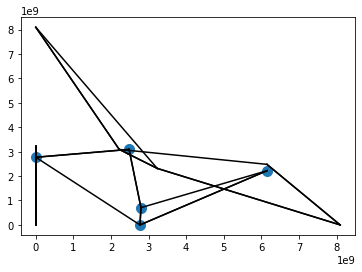

In [144]:
import matplotlib.pyplot as plt 
plt.scatter(dist_sq[:, 0], dist_sq[:, 1], s=100)
X =dist_sq
# draw lines from each point to its two nearest neighbors
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

In [145]:
pivot_ds.values[:, np.newaxis, :]

array([[[ 1048.17769232, -2687.58494897,   485.51534073, -3224.62257302,
          7341.47050345,  8384.14474218, -1091.71348306, -3998.26094174,
          3532.82418606, -1070.67001584, 13628.51073633,   349.69073019,
          2456.84464   , -2923.29938371, -2018.65393295,   845.21666643,
         -8696.23302953,  8346.01328408,  1870.34288293, 11260.67379091,
          3553.9451031 , -2331.80049234,  3037.84920228, -7235.60870467,
         -5168.63784896,  1323.07143146, -2345.38495432, -2025.37584928,
          -302.93482763, -2255.9344067 ,  -856.83769165,  -791.53249099,
          6196.65854928, -7395.91641019,   952.93308262,  1027.03211327,
          4564.41327584, -1543.67597071,  3296.97609606,  2337.2925471 ,
         -2834.28511635,  5454.6893716 ,  6538.71810668,  4133.52737749,
          6674.68593186,  1707.00486761, -5631.38685987, -1693.75085649,
         -6040.09577761, -1058.40880361]],

       [[ 5979.86273908,  2891.18503418,  5288.72384452, -1597.8973196 ,
       

In [146]:
df.groupby("valuator_id")["val_diff"].mean()

valuator_id
V1     702.512338
V2    4259.350910
V3    9562.655420
V4   -2337.219955
V5    2988.908808
Name: val_diff, dtype: float64

In [147]:
df.sort_values(by=["home_id","valuator_id"],inplace = True)

In [148]:
def bias_adjust(gp):
  
  res = gp.loc[gp.valuator_id=="V1", "valuation"].values -702.512338 +\
  gp.loc[gp.valuator_id=="V2", "valuation"].values- 4259.350910 +\
  gp.loc[gp.valuator_id=="V3", "valuation"].values- 9562.655420 +\
  gp.loc[gp.valuator_id=="V4", "valuation"].values +2337.219955 +\
  gp.loc[gp.valuator_id=="V5", "valuation"].values -2988.908808
  return res

df.groupby("home_id").apply(bias_adjust)

home_id
1      [1283586.335133501]
2      [1305131.784461849]
3     [1255612.7474923742]
4     [1181541.6930613793]
5       [1359125.81056532]
6     [1448192.6242968212]
7      [880400.4753336171]
8       [1318544.11602488]
9       [1301655.96948655]
10     [1190949.019116458]
11    [1385124.4770773302]
12    [1186092.8665073332]
13     [1222278.261185164]
14    [1414242.4739145702]
15    [1486447.3771309291]
16     [1293236.320263193]
17     [1176260.308961594]
18    [1067027.6456501172]
19     [1189303.755861063]
20    [1114392.4121913451]
21    [1200641.5476132461]
22     [1293232.216352147]
23     [1125766.765615724]
24    [1673358.4864398013]
25    [1256554.2654966752]
26     [1423087.641006822]
27     [907069.5404595771]
28     [1384977.637203509]
29     [1061336.558667794]
30    [1378506.9692154971]
31    [1285679.3227661923]
32     [1190441.243925926]
33    [1450899.7976139833]
34    [1136782.4358348981]
35     [1189043.926617305]
36     [1109271.122453145]
37     [1163529.0138

In [149]:
df.loc[df.valuator_id=="V1", "valuation"]

0      255134.834485
5      259527.443154
10     248395.870950
15     239345.447178
20     278207.994702
25     292770.995459
30     176815.400070
35     263183.925716
40     264774.556389
45     236171.298337
50     292158.894964
55     238672.575279
60     243926.924786
65     272798.993959
70     299570.165041
75     258946.863695
80     228638.246677
85     222672.614438
90     241939.353517
95     233065.793996
100    245785.967610
105    259499.574554
110    227482.136442
115    322239.397728
120    249511.712421
125    285229.289455
130    178980.895650
135    270204.658867
140    210209.710359
145    275338.175922
150    261087.066972
155    236982.610131
160    295924.417455
165    221567.133512
170    233534.503955
175    220994.866683
180    234519.055073
185    276811.872630
190    266308.040582
195    282492.069077
200    235462.154962
205    266745.798125
210    263863.665841
215    211345.807106
220    310027.564556
225    255740.434696
230    267336.583115
235    276960

In [150]:
df

,home_id,close_price,valuator_id,valuation,val_off,val_diff
0,1,254086.656793,V1,255134.834485,1048.177692,1048.177692
1,1,254086.656793,V2,260066.519532,5979.862739,5979.862739
2,1,254086.656793,V3,268071.787818,13985.131025,13985.131025
3,1,254086.656793,V4,254289.709353,203.052560,203.052560
4,1,254086.656793,V5,261199.691466,7113.034673,7113.034673
...,...,...,...,...,...,...
245,50,240825.537407,V1,239767.128603,1058.408804,-1058.408804
246,50,240825.537407,V2,237069.476423,3756.060984,-3756.060984
247,50,240825.537407,V3,249811.783614,8986.246207,8986.246207
248,50,240825.537407,V4,236652.888779,4172.648628,-4172.648628


In [151]:
gp =df.groupby("home_id")
gp.get_group(6)

,home_id,close_price,valuator_id,valuation,val_off,val_diff
25,6,284386.850716,V1,292770.995459,8384.144742,8384.144742
26,6,284386.850716,V2,296301.563816,11914.713099,11914.713099
27,6,284386.850716,V3,304830.660518,20443.809802,20443.809802
28,6,284386.850716,V4,284513.633305,126.782588,126.782588
29,6,284386.850716,V5,284951.978720,565.128004,565.128004


In [152]:
def bias_adjust(gp):
  res = (gp["val_diff"].sum()-702.512338-4259.350910-9562.655420 +2337.219955- 2988.908808)/5
  print(res)
  return res

df.groupby("home_id").apply(bias_adjust)


2630.610233617196
-1188.6712103451769
3212.1938888618033
-6261.731139144196
958.6379144750193
5251.674142890203
-1827.0184865206065
-3473.36345239902
-910.5383060500077
947.8354699736119
-1505.4888118380209
-1104.311246982379
2985.5720910198006
7126.2014405200025
-4299.343547432182
545.6170245215944
-2082.417914052196
-921.0720241885974
-2208.259461417403
1073.3622335700152
-2103.712983786814
-3184.931776217609
709.0658838608076
5196.690855114186
-3369.497170617005
711.310177716369
87.62748711839149
4765.492724838796
1754.6665471057938
-1892.7164851746165
-4808.040110320597
314.1061632782054
452.20061747862565
-1606.5627556123995
5227.21445067699
1886.3899213920063
2751.1609637593856
-36.99904803822219
-2804.1802730001905
-1881.8089272863806
-11.400710602400887
2494.748181502382
-537.5276657204193
-684.6264478888063
4338.752483251424
3088.214992240596
-2600.5282644283716
-2968.3893243264165
-1042.9089202642142
-3193.299423405003


home_id
1     2630.610234
2    -1188.671210
3     3212.193889
4    -6261.731139
5      958.637914
6     5251.674143
7    -1827.018487
8    -3473.363452
9     -910.538306
10     947.835470
11   -1505.488812
12   -1104.311247
13    2985.572091
14    7126.201441
15   -4299.343547
16     545.617025
17   -2082.417914
18    -921.072024
19   -2208.259461
20    1073.362234
21   -2103.712984
22   -3184.931776
23     709.065884
24    5196.690855
25   -3369.497171
26     711.310178
27      87.627487
28    4765.492725
29    1754.666547
30   -1892.716485
31   -4808.040110
32     314.106163
33     452.200617
34   -1606.562756
35    5227.214451
36    1886.389921
37    2751.160964
38     -36.999048
39   -2804.180273
40   -1881.808927
41     -11.400711
42    2494.748182
43    -537.527666
44    -684.626448
45    4338.752483
46    3088.214992
47   -2600.528264
48   -2968.389324
49   -1042.908920
50   -3193.299423
dtype: float64

In [153]:
gp=df.groupby("home_id")
g1 =gp.get_group(1)
g1

,home_id,close_price,valuator_id,valuation,val_off,val_diff
0,1,254086.656793,V1,255134.834485,1048.177692,1048.177692
1,1,254086.656793,V2,260066.519532,5979.862739,5979.862739
2,1,254086.656793,V3,268071.787818,13985.131025,13985.131025
3,1,254086.656793,V4,254289.709353,203.052560,203.052560
4,1,254086.656793,V5,261199.691466,7113.034673,7113.034673


In [154]:
(g1.loc[:,"val_diff"].sum()-702.512338-4259.350910-9562.655420 +2337.219955- 2988.908808)/5

2630.610233617196